### Clustering com KMeans utilizando base credit_card_clients com mais de 2 Atributos

In [1]:
import pandas as pd
base = pd.read_csv('credit_card_clients.csv', header=1)

In [2]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Importando módulos

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
# Criando novo atributo de BILL_TOTAL
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + \
 base['BILL_AMT6']

In [5]:
# Agora, utilizando os atributos LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE e a Classe Payment Next Month
X = base.iloc[:, [1, 2, 3, 4, 5, 25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.13672015,  0.81016074,  0.18582826, -1.05729503, -1.24601985,
        -0.69069198],
       [-0.3659805 ,  0.81016074,  0.18582826,  0.85855728, -1.02904717,
        -0.66599747],
       [-0.59720239,  0.81016074,  0.18582826,  0.85855728, -0.16115646,
        -0.44316987],
       ...,
       [-1.05964618, -1.23432296,  0.18582826,  0.85855728,  0.16430256,
        -0.52525745],
       [-0.67427636, -1.23432296,  1.45111372, -1.05729503,  0.59824792,
        -0.00856436],
       [-0.90549825, -1.23432296,  0.18582826, -1.05729503,  1.14067961,
        -0.10271861]])

### Descobrindo quantos clusters devem ser inseridos no K com o método <i>Elbow</i>

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[180000.0,
 143649.07033242166,
 123753.55143537326,
 108636.95987288722,
 95861.28790760027,
 86984.46026868216,
 80306.33790232586,
 76128.99425541243,
 72237.24128888408,
 69016.24675321295]

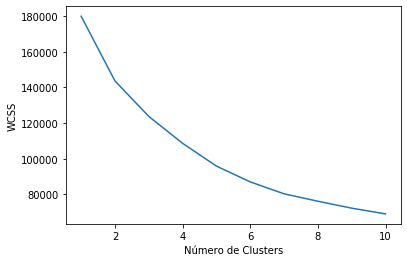

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

### Determinando quantos Clusters utilizar 
#### Fonte do método: https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9

In [9]:
from math import sqrt
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
print(f'Será utilizado {optimal_number_of_clusters(wcss)} clusters.')

Será utilizado 8 clusters.


In [10]:
kmeans = KMeans(n_clusters=8, random_state=0)
previsoes = kmeans.fit_predict(X)

### Infelizmente, com mais de 2 atributos não é possível plottar um gráfico. A análise será manual

In [11]:
import numpy as np
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:, 26].argsort()]

In [12]:
lista_clientes

array([[  19223,  280000,       2, ...,       0, 1051997,       0],
       [  28162,  230000,       2, ...,       0, 1204464,       0],
       [  28160,  350000,       2, ...,       0, 2061977,       0],
       ...,
       [  13774,  240000,       2, ...,       0,    9348,       7],
       [   5469,  350000,       2, ...,       0,     -12,       7],
       [   4818,  120000,       2, ...,       0,  365325,       7]],
      dtype=int64)

In [13]:
lista_clientes_df = pd.DataFrame(lista_clientes)

In [14]:
lista_clientes_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,19223,280000,2,1,1,42,0,0,0,0,...,176939,6232,12104,7002,6302,6417,6502,0,1051997,0
1,28162,230000,2,3,2,46,0,0,0,0,...,-371,135034,10806,20266,15120,343,100014,0,1204464,0
2,28160,350000,2,5,1,45,0,0,0,0,...,348730,13671,12678,13601,12136,12771,12900,0,2061977,0
3,13605,440000,1,1,2,52,2,0,0,0,...,456264,15010,14660,14500,15089,51000,27000,1,2525755,0
4,3538,220000,2,2,1,28,5,6,5,4,...,210491,8355,1000,0,0,6800,97,1,1280410,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,13775,300000,2,1,2,25,1,-2,-1,0,...,0,227,10841,0,100,0,0,0,21015,7
29996,5496,100000,2,1,2,36,0,0,2,0,...,5309,2355,0,500,2000,0,1000,0,41974,7
29997,13774,240000,2,1,2,30,-1,-1,-1,-1,...,1003,1099,6430,1003,1003,1003,203,0,9348,7
29998,5469,350000,2,1,2,33,-2,-2,-2,-2,...,-2,0,0,0,0,0,940,0,-12,7
